# Event Study Example

In [1]:
include("../src/Coefplots.jl")
using .Coefplots
# using Coefplots
using FixedEffectModels
using DataFrames
using Random

Random.seed!(1234)

MersenneTwister(1234)

We first build our example dataset. We have 100 individuals x 20 periods = 2000 observations. The treatment happens at period 8. Only first half of the individuals are treated. And the treatment is generated randomly. The true model of the outcome is equal to the sum of treatment, an individual fixed effect, a time fixed effect and noise. 

In [2]:
N = 100 # 100 individuals
T = 20 # 20 periods
event_time = 8 # make the eighth period be the event time
id = repeat(1:N, inner=T) # generate id
is_treated = id .< N/2 # make first half of individuals are treated, last half of indivuduals are controls
time = Float64.(repeat(1:T, outer=N) .- event_time) # generate time
treatment = repeat(rand(N), inner=T) .* is_treated # generate treatment, 0 if obs are controls
outcome = treatment .* (time .> 0) + id + time .+ rand(N*T) # generate outcome, treatment only have an effect after event time
# use face value of id, time as FE, also add a noise.


df = DataFrame(id = id, time = time, outcome = outcome, treatment = treatment)
first(df,10)

,id,time,outcome,treatment
,Int64,Float64,Float64,Float64
1,1,-7.0,-5.46783,0.590845
2,1,-6.0,-4.25593,0.590845
3,1,-5.0,-3.82579,0.590845
4,1,-4.0,-2.39046,0.590845
5,1,-3.0,-1.41889,0.590845
6,1,-2.0,-0.53814,0.590845
7,1,-1.0,0.854807,0.590845
8,1,0.0,1.64796,0.590845
9,1,1.0,3.37571,0.590845


**The key ingredient of using the event study plot functionality is that one must write the formula analogous to `outcome ~ time&treatment + treatment + ...` while adding `:time => DummyCoding(base=insert_base_year)` to the contrasts dictionary.** This is a useful short-cut to formulate your event study in one line. This action automatically generates the dummy variables, intersects with the treatment, with the specified base year dropped.

In [3]:
res = reg(df, @formula(outcome ~ time&treatment + treatment + fe(id) + fe(time)); contrasts = Dict(:time => DummyCoding(base=0))); 

┌ Info: the renaming is partial, sorting will drop coefficients that is not renamed...
└ @ Main.Coefplots /Users/sunye/Downloads/Coefplots.jl/src/coefplot.jl:295


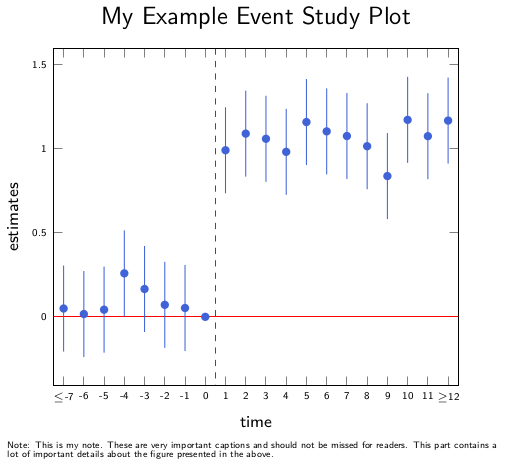

In [4]:
using PGFPlotsX
es_plot = esparse(res; normalized_period = 0)
setxtitle!(es_plot,"time")
setytitle!(es_plot,"estimates")
setname!(es_plot,"My Example Event Study Plot")
includenote!(es_plot,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")

addcomponent!(es_plot, @pgf VLine({red, dashed},event_time+0.5)) # add a vertical line red dashed line
addcomponent!(es_plot, @pgf HLine({red},0)) # add a horizontal line red dashed line
plot(es_plot)

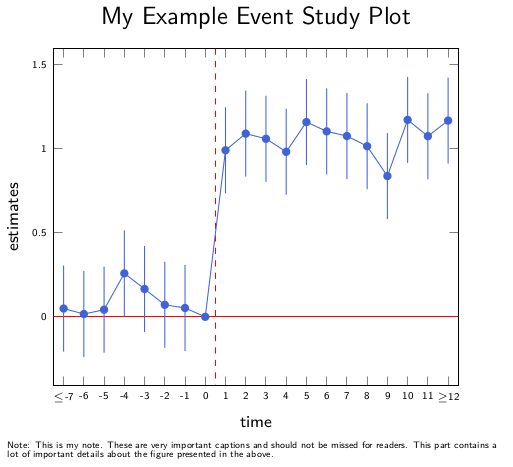

In [5]:
dot_connect!(es_plot)
plot(es_plot)